In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.setrecursionlimit(10000)

Obtener las columnas como una lista, ejecutar esta parte del codigo para reiniciar las listas (que no esten ordenadas de nuevo)

In [3]:
# Cargar los datos
tabla = pd.read_csv('../CSV final/baseDatosFinal.csv')
datos = pd.read_csv('../CSV final/seguimienti.csv')
#algoritmos = pd.read_csv('../CSV final/algorithm_times.csv')

algoritmos = pd.read_csv('../CSV final/algorithm_times.csv')

#obtengo los valores de las columnas a ordenar
listaFechas = tabla["Year"].tolist()

listaAutores = tabla["Authors"].tolist()

listaTitulos = tabla["Title"].tolist()

listaVolumen = tabla["Volume"].tolist()

listaArticulosCitacion = tabla["Article Citation Count"].tolist()

listaPalabrasClave = tabla["Keywords"].tolist()

listaDOI = tabla["DOI"].tolist()

listaEditores = tabla["Publisher"].tolist()

listaISSN = tabla["ISSN"].tolist()

listaISBN = tabla["ISBN"].tolist()

listaPalabrasClaveAutores = tabla["Author Keywords"].tolist()




In [4]:
listaFecha100 = listaFechas[:100]
listaFecha1000= listaFechas[:1000]
listaFecha5000= listaFechas[:5000]
listaAutores100 = listaAutores[:100]
listaAutores1000 = listaAutores[:1000]
listaAutores5000 = listaAutores[:5000]

Timsort

In [5]:
# Python3 program to perform TimSort.  
RUN = 32 
    
# This function sorts array from left index to  
# to right index which is of size atmost RUN  
def insertionSort(arr, left, right):  
   
    for i in range(left + 1, right+1):  
       
        temp = arr[i]  
        j = i - 1 
        while arr[j] > temp and j >= left:  
           
            arr[j+1] = arr[j]  
            j -= 1
           
        arr[j+1] = temp  
    
# merge function merges the sorted runs  
# merge function merges the sorted runs  
def merge(arr, l, m, r): 
   
    # original array is broken in two parts  
    # left and right array  
    len1, len2 =  m - l + 1, r - m  
    left, right = [], []  
    
    # Ensure m and r are within bounds of the array
    if l + len1 > len(arr):
        len1 = len(arr) - l
    if m + 1 + len2 > len(arr):
        len2 = len(arr) - (m + 1)
    
    for i in range(0, len1):  
        left.append(arr[l + i])  
    for i in range(0, len2):  
        right.append(arr[m + 1 + i])  
    
    i, j, k = 0, 0, l 
    # after comparing, we merge those two arrays  
    while i < len1 and j < len2:  
        if left[i] <= right[j]:  
            arr[k] = left[i]  
            i += 1 
        else: 
            arr[k] = right[j]  
            j += 1 
        k += 1
    
    # copy remaining elements of left, if any  
    while i < len1:  
        arr[k] = left[i]  
        k += 1 
        i += 1
    
    # copy remaining elements of right, if any  
    while j < len2:  
        arr[k] = right[j]  
        k += 1
        j += 1
      
# iterative Timsort function to sort the  
# array[0...n-1] (similar to merge sort)  
def timSort(arr, n):  
   
    # Sort individual subarrays of size RUN  
    for i in range(0, n, RUN):  
        insertionSort(arr, i, min((i+31), (n-1)))  
    
    # start merging from size RUN (or 32). It will merge  
    # to form size 64, then 128, 256 and so on ....  
    size = RUN 
    while size < n:  
       
        # pick starting point of left sub array. We  
        # are going to merge arr[left..left+size-1]  
        # and arr[left+size, left+2*size-1]  
        # After every merge, we increase left by 2*size  
        for left in range(0, n, 2*size):  
           
            # find ending point of left sub array  
            # mid+1 is starting point of right sub array  
            mid = left + size - 1 
            right = min((left + 2*size - 1), (n-1))  
    
            # merge sub array arr[left.....mid] &  
            # arr[mid+1....right]  
            merge(arr, left, mid, right)  
          
        size = 2*size
        
    return arr

In [6]:
import timeit

# Medir el tiempo de ejecución de timSort con enteros
execution_time = round(timeit.timeit("timSort(listaFecha5000, len(listaFecha5000))", 
                               setup="from __main__ import timSort, listaFecha5000", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")


Tiempo de ejecución: 7.7584 milisegundos


In [7]:
import timeit

# Medir el tiempo de ejecución de timSort con cadenas
execution_time = round(timeit.timeit("timSort(listaAutores, len(listaAutores))", 
                               setup="from __main__ import timSort, listaAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")


Tiempo de ejecución: 31.7778 milisegundos


In [8]:
import timeit

# Medir el tiempo de ejecución de timSort con cadenas largas
execution_time = round(timeit.timeit("timSort(listaPalabrasClaveAutores, len(listaPalabrasClaveAutores))", 
                               setup="from __main__ import timSort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")


Tiempo de ejecución: 24.3087 milisegundos


Comb Sort

In [9]:
# Python program for implementation of CombSort

# To find next gap from current
def getNextGap(gap):
    # Shrink gap by Shrink factor
    gap = (gap * 10) / 13
    if gap < 1:
        return 1
    return int(gap)  # Convertir gap a entero

# Function to sort arr[] using Comb Sort
def combSort(arr):
    n = len(arr)

    # Initialize gap
    gap = n

    # Initialize swapped as true to make sure that
    # loop runs
    swapped = True

    # Keep running while gap is more than 1 and last
    # iteration caused a swap
    while gap != 1 or swapped:
        # Find next gap
        gap = getNextGap(gap)

        # Initialize swapped as false so that we can
        # check if swap happened or not
        swapped = False

        # Compare all elements with current gap
        for i in range(0, n - gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                swapped = True

In [10]:
import timeit

# Medir el tiempo de ejecución de combSort usando la lista de fechas
execution_time = round(timeit.timeit("combSort(listaFecha5000)", 
                               setup="from __main__ import combSort, listaFecha5000", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 10.3446 milisegundos


In [11]:
import timeit

# Medir el tiempo de ejecución de combSort usando la lista de autores
execution_time = round(timeit.timeit("combSort(listaAutores)", 
                               setup="from __main__ import combSort, listaAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 35.7409 milisegundos


In [12]:
import timeit

# Medir el tiempo de ejecución de combSort usando la lista de palabras claves del autor
execution_time = round(timeit.timeit("combSort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import combSort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 18.8785 milisegundos


Selection Sort


In [13]:
def selectionSort(l):
    for start in range(len(l)):

        #assign start value as minimum value
        minpos=start
        
        for i in range(start,len(l)):
            if(l[i]<l[minpos]):
                minpos=i
            
        (l[start],l[minpos]) = (l[minpos],l[start])

In [14]:
import timeit

# Medir el tiempo de ejecución usando lista de fechas
execution_time = round(timeit.timeit("selectionSort(listaFechas)", 
                               setup="from __main__ import selectionSort, listaFechas", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 2808.8669 milisegundos


In [15]:
import timeit

# Medir el tiempo de ejecución usando lista de autores
execution_time = round(timeit.timeit("selectionSort(listaAutores100)", 
                               setup="from __main__ import selectionSort, listaAutores100", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 0.2803 milisegundos


In [16]:
import timeit

# Medir el tiempo de ejecución usando lista de fechas
execution_time = round(timeit.timeit("selectionSort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import selectionSort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 3095.9061 milisegundos


Tree Sort


In [17]:
class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def insert(root, key):
    if root is None:
        return TreeNode(key)
    
    if key < root.val:
        root.left = insert(root.left, key)
    else:
        root.right = insert(root.right, key)
    
    return root

def inorder_traversal(root, res):
    if root:
        inorder_traversal(root.left, res)
        res.append(root.val)
        inorder_traversal(root.right, res)

def tree_sort(arr):
    if not arr:
        return arr
    
    root = None
    for key in arr:
        root = insert(root, key)
    
    sorted_arr = []
    inorder_traversal(root, sorted_arr)
    return sorted_arr

In [18]:
import timeit


# Medir el tiempo de ejecución de fecha con tree_sort
execution_time = round(timeit.timeit("tree_sort(listaFechas)", 
                               setup="from __main__ import tree_sort, listaFechas", 
                                  number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 9880.0463 milisegundos


In [19]:
import timeit


# Medir el tiempo de ejecución de tree_sort
execution_time = round(timeit.timeit("tree_sort(listaAutores)", 
                               setup="from __main__ import tree_sort, listaAutores", 
                                  number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 11211.3528 milisegundos


In [20]:
import timeit


# Medir el tiempo de ejecución de tree_sort
execution_time = round(timeit.timeit("tree_sort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import tree_sort, listaPalabrasClaveAutores", 
                                  number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 9122.0893 milisegundos


PigeOnHole Sort

In [21]:
def pigeonhole_sort(a, key=lambda x: x): 
    # Encontrar el mínimo y máximo utilizando la clave proporcionada
    my_min = min(a, key=key)
    my_max = max(a, key=key)

    # Si la clave es una cadena, usamos `ord()` en el primer carácter
    if isinstance(key(my_min), str) and isinstance(key(my_max), str):
        size = ord(key(my_max)[0]) - ord(key(my_min)[0]) + 1
    else:
        size = key(my_max) - key(my_min) + 1
  
    # Crear los agujeros (pigeonholes)
    holes = [[] for _ in range(size)] 
  
    # Rellenar los agujeros con los elementos transformados por la clave
    for x in a:
        if isinstance(key(x), str):
            index = ord(key(x)[0]) - ord(key(my_min)[0])  # Para cadenas
        else:
            index = key(x) - key(my_min)  # Para números
        holes[index].append(x)
  
    # Poner los elementos ordenados de vuelta en la lista original
    i = 0
    for hole in holes: 
        for item in sorted(hole, key=key):  # Ordenar dentro del agujero usando la clave
            a[i] = item
            i += 1

In [22]:
import timeit

# Medir el tiempo de ejecución de PigeOnHole Sort
execution_time = round(timeit.timeit("pigeonhole_sort(listaFechas)", 
                               setup="from __main__ import pigeonhole_sort, listaFechas", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 4.0771 milisegundos


In [23]:
import timeit

# Medir el tiempo de ejecución de PigeOnHole Sort
execution_time = round(timeit.timeit("pigeonhole_sort(listaAutores)", 
                               setup="from __main__ import pigeonhole_sort, listaAutores", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 5.814 milisegundos


In [24]:
import timeit

# Medir el tiempo de ejecución de PigeOnHole Sort
execution_time = round(timeit.timeit("pigeonhole_sort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import pigeonhole_sort, listaPalabrasClaveAutores", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 4.2001 milisegundos


Bucket Sort

In [25]:
def bucket_sort(array, key=lambda x: x):
    # Encontrar el valor máximo basado en la clave
    max_value = max(array, key=key)

    # Crear los buckets vacíos
    bucket = [[] for _ in range(len(array))]

    # Insertar los elementos en los buckets respectivos
    for item in array:
        # Normalizar para cadenas y números
        if isinstance(key(item), str):
            index_b = int(ord(key(item)[0]) / ord(key(max_value)[0]) * (len(array) - 1))
        else:
            index_b = int(key(item) / key(max_value) * (len(array) - 1))
        bucket[index_b].append(item)

    # Ordenar los elementos dentro de cada bucket
    for i in range(len(array)):
        bucket[i] = sorted(bucket[i], key=key)

    # Obtener los elementos ordenados
    k = 0
    for i in range(len(array)):
        for j in range(len(bucket[i])):
            array[k] = bucket[i][j]
            k += 1
    
    return array


In [26]:
import timeit

# Medir el tiempo de ejecución de bucket_sort
execution_time = round(timeit.timeit("bucket_sort(listaFechas)", 
                               setup="from __main__ import bucket_sort, listaFechas", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 8.9287 milisegundos


In [27]:
import timeit

# Medir el tiempo de ejecución de bucket_sort
execution_time = round(timeit.timeit("bucket_sort(listaAutores)", 
                               setup="from __main__ import bucket_sort, listaAutores", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 10.674 milisegundos


In [28]:
import timeit

# Medir el tiempo de ejecución de bucket_sort
execution_time = round(timeit.timeit("bucket_sort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import bucket_sort, listaPalabrasClaveAutores", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 8.5806 milisegundos


Quick Sort

In [29]:
# Python program for implementation of Quicksort Sort

# This implementation utilizes pivot as the last element in the nums list
# It has a pointer to keep track of the elements smaller than the pivot
# At the very end of partition() function, the pointer is swapped with the pivot
# to come up with a "sorted" nums relative to the pivot


# Function to find the partition position
def partition(array, low, high):

    # choose the rightmost element as pivot
    pivot = array[high]

    # pointer for greater element
    i = low - 1

    # traverse through all elements
    # compare each element with pivot
    for j in range(low, high):
        if array[j] <= pivot:

            # If element smaller than pivot is found
            # swap it with the greater element pointed by i
            i = i + 1

            # Swapping element at i with element at j
            (array[i], array[j]) = (array[j], array[i])

    # Swap the pivot element with the greater element specified by i
    (array[i + 1], array[high]) = (array[high], array[i + 1])

    # Return the position from where partition is done
    return i + 1

# function to perform quicksort


def quickSortRun(array, low, high):
    if low < high:

        # Find pivot element such that
        # element smaller than pivot are on the left
        # element greater than pivot are on the right
        pi = partition(array, low, high)

        # Recursive call on the left of pivot
        quickSortRun(array, low, pi - 1)

        # Recursive call on the right of pivot
        quickSortRun(array, pi + 1, high)


def quickSort(array):
    quickSortRun(array, 0, len(array)-1)

In [30]:
import timeit

# Medir el tiempo de ejecución de quick_sort
execution_time = round(timeit.timeit("quickSort(listaFechas)", 
                               setup="from __main__ import quickSort, listaFechas", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 5240.6395 milisegundos


In [31]:
import timeit

# Medir el tiempo de ejecución de quick_sort
execution_time = round(timeit.timeit("quickSort(listaAutores)", 
                               setup="from __main__ import quickSort, listaAutores", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 7387.177 milisegundos


In [32]:
import timeit

# Medir el tiempo de ejecución de quick_sort
execution_time = round(timeit.timeit("quickSort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import quickSort, listaPalabrasClaveAutores", 
                               number=1)*1000,5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 6272.9528 milisegundos


HeapSort

In [33]:
# Python program for implementation of heap Sort 
  
# To heapify subtree rooted at index i. 
# n is size of heap 
def heapify(arr, n, i): 
    largest = i # Initialize largest as root 
    l = 2 * i + 1     # left = 2*i + 1 
    r = 2 * i + 2     # right = 2*i + 2 
  
    # See if left child of root exists and is 
    # greater than root 
    if l < n and arr[i] < arr[l]: 
        largest = l 
  
    # See if right child of root exists and is 
    # greater than root 
    if r < n and arr[largest] < arr[r]: 
        largest = r 
  
    # Change root, if needed 
    if largest != i: 
        arr[i],arr[largest] = arr[largest],arr[i] # swap 
  
        # Heapify the root. 
        heapify(arr, n, largest) 
  
# The main function to sort an array of given size 
def heapSort(arr): 
    n = len(arr) 
  
    # Build a maxheap. 
    for i in range(n, -1, -1): 
        heapify(arr, n, i) 
  
    # One by one extract elements 
    for i in range(n-1, 0, -1): 
        arr[i], arr[0] = arr[0], arr[i] # swap 
        heapify(arr, i, 0) 

In [34]:
import timeit

# Medir el tiempo de ejecución de HeapSort
execution_time = round(timeit.timeit("heapSort(listaFecha5000)", 
                               setup="from __main__ import heapSort, listaFecha5000", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 16.834 milisegundos


In [35]:
import timeit

# Medir el tiempo de ejecución de HeapSort
execution_time = round(timeit.timeit("heapSort(listaAutores5000)", 
                               setup="from __main__ import heapSort, listaAutores5000", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 20.9714 milisegundos


In [36]:
import timeit

# Medir el tiempo de ejecución de HeapSort
execution_time = round(timeit.timeit("heapSort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import heapSort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 18.2534 milisegundos


Bitonic Sort

In [37]:
def compAndSwap(a, i, j, dire):
    if (dire == 1 and a[i] > a[j]) or (dire == 0 and a[i] > a[j]):
        a[i], a[j] = a[j], a[i]
 
# It recursively sorts a bitonic sequence in ascending order,
# if dir = 1, and in descending order otherwise (means dir=0).
# The sequence to be sorted starts at index position low,
# the parameter cnt is the number of elements to be sorted.
 
 
def bitonicMerge(a, low, cnt, dire):
    if cnt > 1:
        k = cnt//2
        for i in range(low, low+k):
            compAndSwap(a, i, i+k, dire)
        bitonicMerge(a, low, k, dire)
        bitonicMerge(a, low+k, k, dire)
 
# This function first produces a bitonic sequence by recursively
# sorting its two halves in opposite sorting orders, and then
# calls bitonicMerge to make them in the same order
 
 
def bitonicSort(a, low, cnt, dire):
    if cnt > 1:
        k = cnt//2
        bitonicSort(a, low, k, 1)
        bitonicSort(a, low+k, k, 0)
        bitonicMerge(a, low, cnt, dire)
 
# Caller of bitonicSort for sorting the entire array of length N
# in ASCENDING order
 
 
def sort(a, N, up):
    bitonicSort(a, 0, N, up)

In [38]:
import timeit

# Medir el tiempo de ejecución de Bitonic Sort

execution_time = round(timeit.timeit("sort(listaFechas,len(listaFechas),1)", 
                               setup="from __main__ import sort, listaFechas", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 87.4762 milisegundos


In [39]:
import timeit

# Medir el tiempo de ejecución de Bitonic Sort

execution_time = round(timeit.timeit("sort(listaAutores,len(listaAutores),1)", 
                               setup="from __main__ import sort, listaAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 147.4601 milisegundos


In [40]:
import timeit

# Medir el tiempo de ejecución de Bitonic Sort

execution_time = round(timeit.timeit("sort(listaPalabrasClaveAutores,len(listaPalabrasClaveAutores),1)", 
                               setup="from __main__ import sort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 115.8231 milisegundos


Gnome Sort

In [41]:
def swapPositions(list,posA, posB):
    list[posA], list[posB] = list[posB], list[posA]
    return list

def gnomeSort(listToBeSorted):
    position = 0
    while position < len(listToBeSorted):
        if position == 0 or listToBeSorted[position] >= listToBeSorted[position - 1]:
            position = position +1
        else:
            swapPositions(listToBeSorted, position, position -1)
            position = position -1

    return listToBeSorted

In [42]:
import timeit

# Medir el tiempo de ejecución de Gnome Sort

execution_time = round(timeit.timeit("gnomeSort(listaFecha5000)", 
                               setup="from __main__ import gnomeSort, listaFecha5000", 
                               number=1)*1000, 5)


print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 0.8913 milisegundos


In [43]:
import timeit

# Medir el tiempo de ejecución de Gnome Sort

execution_time = round(timeit.timeit("gnomeSort(listaAutores)", 
                               setup="from __main__ import gnomeSort, listaAutores", 
                               number=1)*1000, 5)


print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 4.545 milisegundos


In [44]:
import timeit

# Medir el tiempo de ejecución de Gnome Sort

execution_time = round(timeit.timeit("gnomeSort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import gnomeSort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)


print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 1.7142 milisegundos


Binary Insertion Sort

In [45]:
def binary_search(arr, val, start, end):
    # we need to distinguish whether we should insert
    # before or after the left boundary.
    # imagine [0] is the last step of the binary search
    # and we need to decide where to insert -1
    if start == end:
        if arr[start] > val:
            return start
        else:
            return start+1
 
    # this occurs if we are moving beyond left\'s boundary
    # meaning the left boundary is the least position to
    # find a number greater than val
    if start > end:
        return start
 
    mid = (start+end)//2
    if arr[mid] < val:
        return binary_search(arr, val, mid+1, end)
    elif arr[mid] > val:
        return binary_search(arr, val, start, mid-1)
    else:
        return mid
 
def insertion_sort(arr):
    for i in range(1, len(arr)):
        val = arr[i]
        j = binary_search(arr, val, 0, i-1)
        arr = arr[:j] + [val] + arr[j:i] + arr[i+1:]
    return arr

In [46]:
import timeit

# Medir el tiempo de ejecución de Binary Insertion Sort

execution_time = round(timeit.timeit("insertion_sort(listaFechas)", 
                               setup="from __main__ import insertion_sort, listaFechas", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 1203.6714 milisegundos


In [47]:
import timeit

# Medir el tiempo de ejecución de Binary Insertion Sort

execution_time = round(timeit.timeit("insertion_sort(listaAutores)", 
                               setup="from __main__ import insertion_sort, listaAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 1528.1021 milisegundos


In [48]:
import timeit

# Medir el tiempo de ejecución de Binary Insertion Sort

execution_time = round(timeit.timeit("insertion_sort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import insertion_sort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 1192.5151 milisegundos


RadixSort

In [49]:
def radix_sort(arr, key=lambda x: x):
    # Determinar la longitud máxima a considerar
    max_length = max(len(str(key(item))) for item in arr)
    placement = 1

    def get_char_at_position(item, pos):
        """Obtener el carácter o dígito en la posición `pos` desde la derecha."""
        string_rep = str(key(item))
        if len(string_rep) < pos + 1:
            return 0  # Si la posición no existe, retornar 0 (valor bajo)
        return ord(string_rep[-(pos + 1)]) if isinstance(key(item), str) else (key(item) // placement) % 10

    # Identificar si se está trabajando con cadenas o números
    is_str = isinstance(key(arr[0]), str)

    # Calcular el valor máximo posible en la lista
    if is_str:
        max_char_value = max(ord(max(key(item))) for item in arr)  # Máximo valor ASCII
    else:
        max_char_value = 9  # Para números, máximo valor es 9

    # Realizar el Radix Sort
    for pos in range(max_length):
        buckets = [[] for _ in range(max_char_value + 1)]  # Crear suficientes buckets
        for item in arr:
            char_val = get_char_at_position(item, pos)
            buckets[char_val].append(item)

        # Recombinar los buckets en el array original
        element = 0
        for bucket in buckets:
            for item in bucket:
                arr[element] = item
                element += 1

        placement *= 10

    return arr

In [50]:
import timeit

# Medir el tiempo de ejecución de RadixSort

execution_time = round(timeit.timeit("radix_sort(listaFecha5000)", 
                               setup="from __main__ import radix_sort, listaFecha5000", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 22.0493 milisegundos


In [51]:
import timeit

# Medir el tiempo de ejecución de RadixSort

execution_time = round(timeit.timeit("radix_sort(listaAutores)", 
                               setup="from __main__ import radix_sort, listaAutores", 
                               number=1)*1000, 5) 

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 39925.9195 milisegundos


In [52]:
import timeit

# Medir el tiempo de ejecución de RadixSort

execution_time = round(timeit.timeit("radix_sort(listaPalabrasClaveAutores)", 
                               setup="from __main__ import radix_sort, listaPalabrasClaveAutores", 
                               number=1)*1000, 5)

print(f"Tiempo de ejecución: {execution_time} milisegundos")

Tiempo de ejecución: 1722.2709 milisegundos


In [53]:
# Nueva lista de datos proporcionados
nuevos_datos = [19.2498, 20.7309, 18.1901, 20.4711, 12.4969]

# Calcular la media de los nuevos datos
media_nueva = sum(nuevos_datos) / len(nuevos_datos)
media_nueva

18.22776

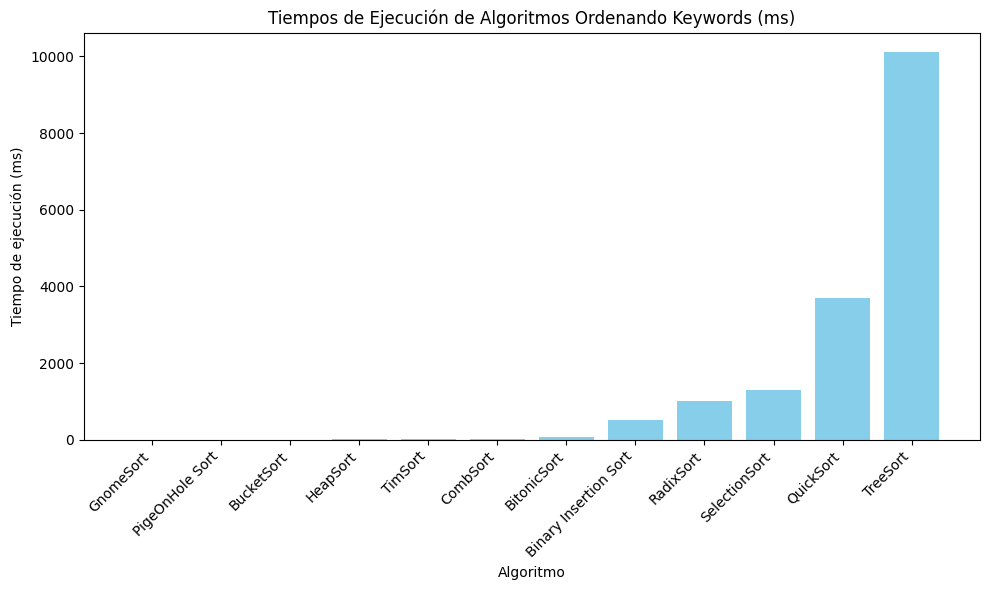

In [54]:
df = pd.read_csv('../CSV final/autores.csv')
# Ordenar el dataframe de acuerdo a 't(n)' de menor a mayor
df_sorted = df.sort_values(by='t(n)', ascending=True)

# Crear el gráfico
plt.figure(figsize=(10,6))
plt.bar(df_sorted['algoritmo'], df_sorted['t(n)'], color='skyblue')
plt.xlabel('Algoritmo')
plt.ylabel('Tiempo de ejecución (ms)')
plt.title('Tiempos de Ejecución de Algoritmos Ordenando Keywords (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

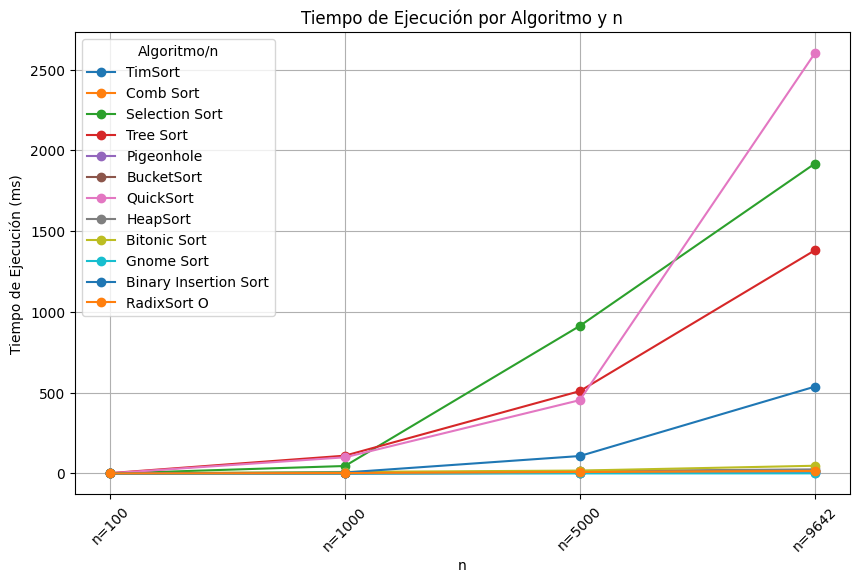

In [55]:
# Crear un gráfico de líneas para el tiempo de ejecución por algoritmo y tamaño n

# Configurar el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada algoritmo
for algoritmo in algoritmos['Algoritmo/n']:
    plt.plot(algoritmos.columns[1:], algoritmos.loc[algoritmos['Algoritmo/n'] == algoritmo].values[0][1:], marker='o', label=algoritmo)

# Configurar etiquetas y título
plt.xlabel('n')
plt.ylabel('Tiempo de Ejecución (ms)')
plt.title('Tiempo de Ejecución por Algoritmo y n')
plt.xticks(algoritmos.columns[1:], rotation=45)  # Ajustar etiquetas del eje x
plt.grid(True)
plt.legend(title='Algoritmo/n')
plt.show()